In [8]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from pylab import *
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.cross_validation import train_test_split

In [9]:
df_cal = pd.read_csv("../data/serieA_1516.csv")

inter      = df_cal[(df_cal['HomeTeam']=='Inter') | (df_cal['AwayTeam']=='Inter')]
inter_home = df_cal[df_cal['HomeTeam']=='Inter']
inter_away = df_cal[df_cal['AwayTeam']=='Inter']

teams = np.array(inter_home["AwayTeam"])
teams2 = np.array(inter_away["HomeTeam"])

#print teams
#print teams2

In [3]:
teams_a = [] 

for i,cal in enumerate(df_cal.iterrows()):
    teams_a.append(cal[1]["HomeTeam"])
    teams_a.append(cal[1]["AwayTeam"])

    if i == 9: break
        
print teams_a 

['Lazio', 'Bologna', 'Verona', 'Roma', 'Empoli', 'Chievo', 'Fiorentina', 'Milan', 'Frosinone', 'Torino', 'Inter', 'Atalanta', 'Juventus', 'Udinese', 'Palermo', 'Genoa', 'Sampdoria', 'Carpi', 'Sassuolo', 'Napoli']


In [4]:
#teams 2015/16
#teams_a = ['Lazio', 'Verona', 'Empoli', 'Fiorentina', 'Frosinone', 'Inter', 'Juventus', 'Palermo', 'Sampdoria', 'Sassuolo',
#           'Bologna', 'Roma', 'Chievo', 'Milan', 'Torino', 'Atalanta', 'Udinese', 'Genoa', 'Carpi', 'Napoli']

#teams 2014/15
#teams_a = ['Lazio', 'Verona', 'Empoli', 'Fiorentina', 'Parma', 'Inter', 'Juventus', 'Palermo', 'Sampdoria', 'Sassuolo', 
#           'Cagliari', 'Roma', 'Chievo', 'Milan', 'Torino', 'Atalanta', 'Udinese', 'Genoa', 'Cesena', 'Napoli']

team_stat = []
team_stat_sum = []
team_stat_var = []
team_stat_var2 = []
team_stat_acc = []
team_stat_s = []
team_stat_st = []
team_stat_agg = []
team_stat_sc = []
team_stat_stc = []
team_stat_points = []

for team_a in teams_a:
    #print team_a
    team      = df_cal[(df_cal['HomeTeam']==team_a) | (df_cal['AwayTeam']==team_a)]
    team_home = df_cal[df_cal['HomeTeam']==team_a]
    team_away = df_cal[df_cal['AwayTeam']==team_a]
    #calculate points
    cond   = [(team["HomeTeam"]==team_a) & (team["FTHG"]>team["FTAG"]) | (team["AwayTeam"]==team_a) & (team["FTHG"]<team["FTAG"]),
              (team["HomeTeam"]==team_a) & (team["FTHG"]<team["FTAG"]) | (team["AwayTeam"]==team_a) & (team["FTHG"]>team["FTAG"]),
              team["FTHG"]==team["FTAG"]]
    #team['points'] = np.select(cond,choice)
    
    team_h_win = len(team_home[team_home['FTHG']>team_home['FTAG']])
    team_a_win = len(team_away[team_away['FTAG']>team_away['FTHG']])
    team_draw = len(team[team['FTAG']==team['FTHG']])
    team_points = 3*team_a_win + 3*team_h_win + team_draw
    #print team_home
    #print team_away
    #shots made
    team_s    = team_away["AS"].sum()  + team_home["HS"].sum()
    team_st   = team_away["AST"].sum() + team_home["HST"].sum()
    team_acc  = float(team_st)/float(team_s)
    #shots conceded
    team_sc    = team_away["HS"].sum()  + team_home["AS"].sum()
    team_stc   = team_away["HST"].sum() + team_home["AST"].sum()
    team_agg  = float(team_stc)/float(team_sc)
    
    #print "ale s", team_s, 
    #print "ale st", team_st
    #print "ale acc", team_acc
    #calculate the shoot accuracy (one variable)    
    team_sh_ratio_a = team_away["AST"]/team_away["AS"]
    team_sh_ratio_h = team_home["HST"]/team_home["HS"]
    #print team_sh_ratio_a
    
    #calculate the metric number 0 (one variable)
    team_var_ratio_a = team_away["AS"]/team_away["HS"]
    team_var_ratio_h = team_home["HS"]/team_home["AS"]
    #calculate the metric number 0.5 (one variable)
    team_var2_ratio_a = team_away["AST"]/team_away["HST"]
    team_var2_ratio_h = team_home["HST"]/team_home["AST"]
    
    #calculate the metric number 1 (multiply)
    team_all_ratio_a = team_away["AST"]/team_away["AS"]*team_away["HS"]/team_away["HST"]
    team_all_ratio_h = team_home["HST"]/team_home["HS"]*team_home["AS"]/team_home["AST"]
    #calculate the metric number 1 (sum)
    team_all_ratio_sum_a = team_away["AST"]/team_away["AS"] + team_away["HS"]/team_away["HST"]
    team_all_ratio_sum_h = team_home["HST"]/team_home["HS"] + team_home["AS"]/team_home["AST"]
    #print "home ", np.mean(np.ma.masked_invalid(team_all_ratio_h))
    #print "away ",np.mean(np.ma.masked_invalid(team_all_ratio_a))
    team_stat.append(( team_a,
                       team_points, 
                       np.mean(np.ma.masked_invalid(team_all_ratio_a)) + np.mean(np.ma.masked_invalid(team_all_ratio_h))  ))
    team_stat_sum.append(( team_a, 
                           team_points, 
                           np.mean(np.ma.masked_invalid(team_all_ratio_sum_a)) + np.mean(np.ma.masked_invalid(team_all_ratio_sum_h))  ))
    team_stat_var.append(( team_a,
                           team_points,
                           np.mean(np.ma.masked_invalid(team_var_ratio_a)) + np.mean(np.ma.masked_invalid(team_var_ratio_h)),
                           np.std(np.ma.masked_invalid(team_var_ratio_a))/2 + np.std(np.ma.masked_invalid(team_var_ratio_h))/2  ))
    team_stat_var2.append(( team_a,
                            team_points,
                            np.mean(np.ma.masked_invalid(team_var2_ratio_a)) + np.mean(np.ma.masked_invalid(team_var2_ratio_h)),
                            np.std(np.ma.masked_invalid(team_var2_ratio_a))/2 + np.std(np.ma.masked_invalid(team_var2_ratio_h))/2  ))
    team_stat_points.append((team_a,
                            team_points))
    team_stat_acc.append(( team_a,
                          team_points, 
                          team_acc  ))
    team_stat_s.append(( team_a,
                          team_points, 
                          team_s  ))
    team_stat_st.append(( team_a,
                          team_points, 
                          team_st  ))
    team_stat_agg.append(( team_a,
                          team_points, 
                          team_agg  ))
    team_stat_sc.append(( team_a,
                          team_points, 
                          team_sc  ))
    team_stat_stc.append(( team_a,
                          team_points, 
                          team_stc  ))
    #print np.std(np.ma.masked_invalid(team_all_ratio_h))
    print team_a, team_points
    
team_stat_sort = sorted(team_stat, key=lambda x: x[1])
#print team_stat_sort

team_stat_sum_sort = sorted(team_stat_sum, key=lambda x: x[1])
#print team_stat_sum_sort

team_stat_var_sort = sorted(team_stat_var, key=lambda x: x[1])
#print team_stat_var_sort

team_stat_var2_sort = sorted(team_stat_var2, key=lambda x: x[1])
print team_stat_var2_sort
#df_cal

team_stat_points_sort = sorted(team_stat_points, key=lambda x: x[1])
print team_stat_points_sort

team_stat_acc_sort = sorted(team_stat_acc, key=lambda x: x[1])
print team_stat_acc_sort

team_stat_s_sort = sorted(team_stat_s, key=lambda x: x[1])
print team_stat_s_sort

team_stat_st_sort = sorted(team_stat_st, key=lambda x: x[1])
print team_stat_st_sort

team_stat_agg_sort = sorted(team_stat_agg, key=lambda x: x[1])
print team_stat_agg_sort

team_stat_sc_sort = sorted(team_stat_sc, key=lambda x: x[1])
print team_stat_sc_sort

team_stat_stc_sort = sorted(team_stat_stc, key=lambda x: x[1])
print team_stat_stc_sort

df_cal[['HomeTeam', 'AwayTeam', 'AS', 'AST', 'HS', 'HST']]


Lazio 54
Bologna 42
Verona 28
Roma 80
Empoli 46
Chievo 50
Fiorentina 64
Milan 57
Frosinone 31
Torino 45
Inter 67
Atalanta 45
Juventus 91
Udinese 39
Palermo 39
Genoa 46
Sampdoria 40
Carpi 38
Sassuolo 61
Napoli 82
[('Verona', 28, 2.0221177944862152, 0.89446707380290391), ('Frosinone', 31, 1.5722791828054985, 0.65822263409478166), ('Carpi', 38, 1.7208298524087997, 0.58870442862211281), ('Udinese', 39, 2.6375626566416042, 1.4619609723906288), ('Palermo', 39, 1.5107560568086884, 0.65020586175412753), ('Sampdoria', 40, 2.2844193817878029, 1.1091543952488421), ('Bologna', 42, 2.2986992945326277, 1.1776430068467445), ('Torino', 45, 2.74265811587793, 0.85991507594556693), ('Atalanta', 45, 2.5290517961570593, 1.0662891389101536), ('Empoli', 46, 2.2709273182957395, 0.79278682827706259), ('Genoa', 46, 2.2391133557800225, 0.89564401741184985), ('Chievo', 50, 2.2472089314194577, 0.88878380727288686), ('Lazio', 54, 2.9876148705096073, 1.4146871570192794), ('Milan', 57, 3.1824561403508769, 1.169020094

,HomeTeam,AwayTeam,AS,AST,HS,HST
0,Lazio,Bologna,9,4,21,9
1,Verona,Roma,21,8,12,7
2,Empoli,Chievo,12,3,15,5
3,Fiorentina,Milan,8,0,13,7
4,Frosinone,Torino,26,7,13,3
5,Inter,Atalanta,4,0,21,7
6,Juventus,Udinese,6,2,21,5
7,Palermo,Genoa,11,3,19,6
8,Sampdoria,Carpi,24,7,10,7
9,Sassuolo,Napoli,15,3,16,6


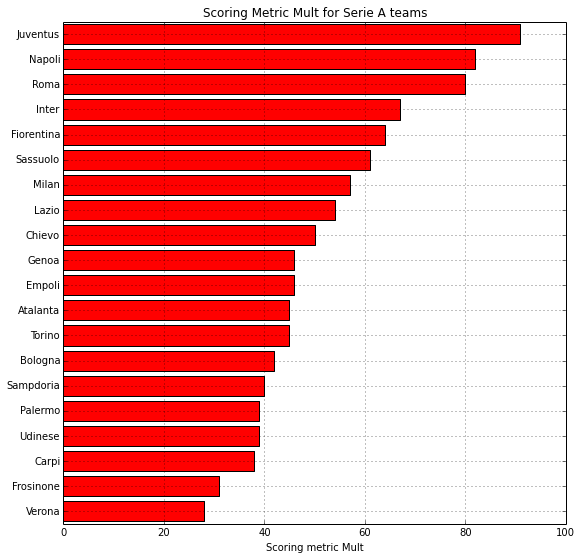

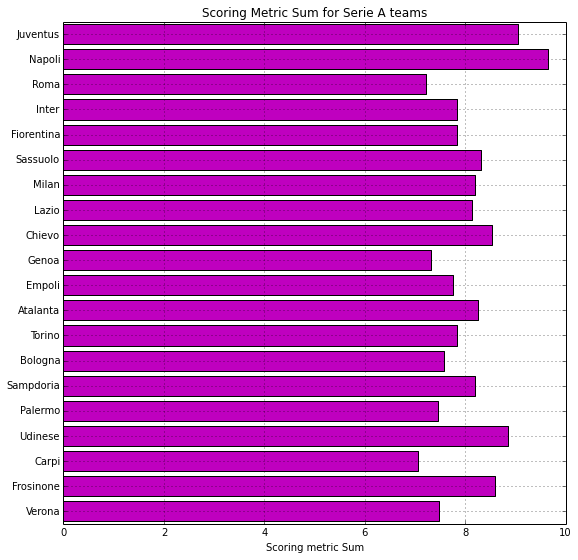

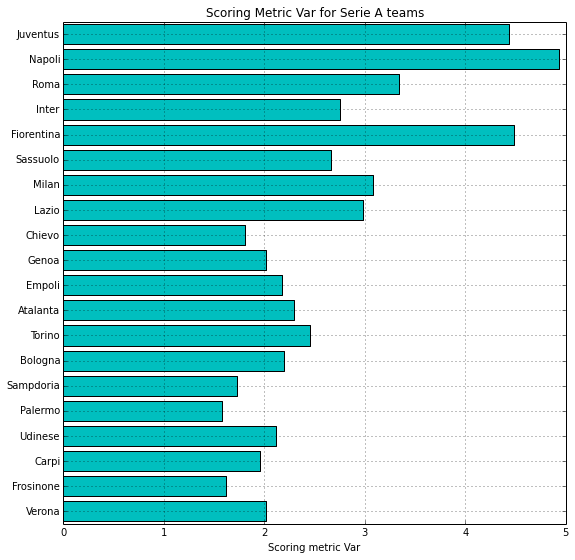

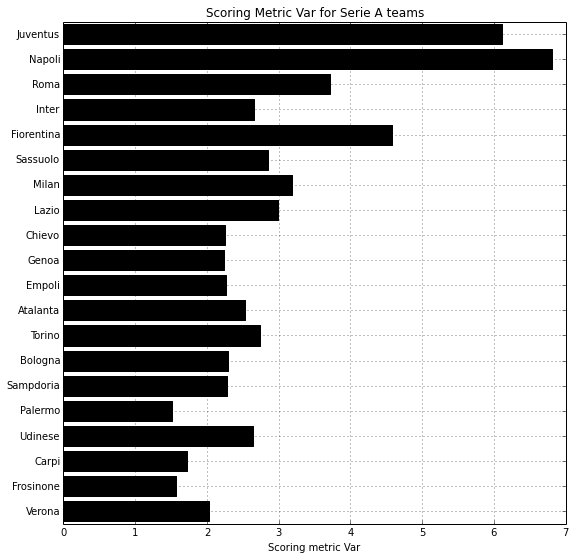

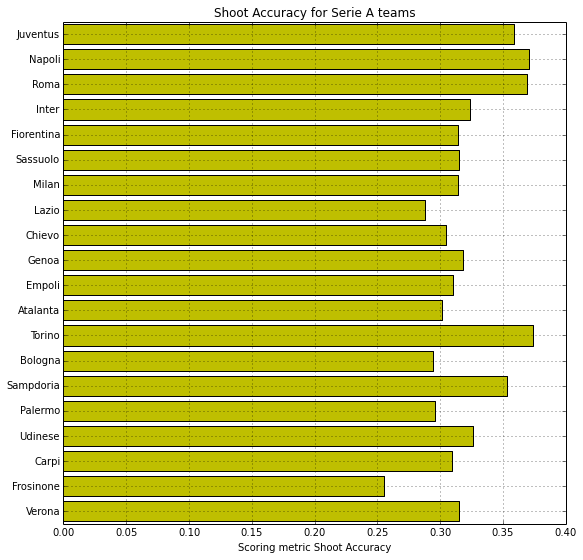

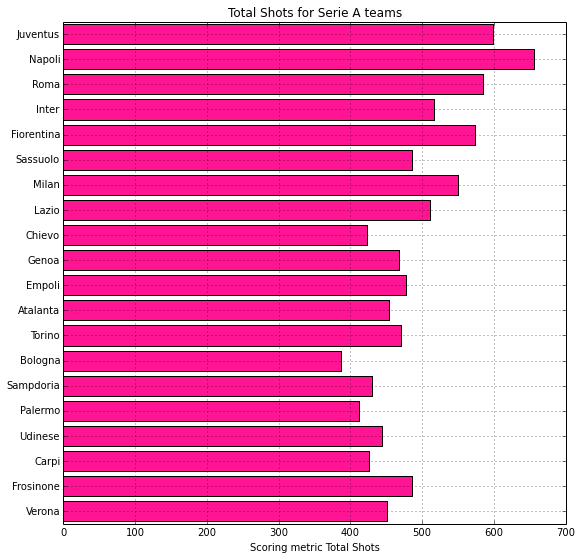

In [5]:
team_name    = [t[0] for t in team_stat_sort]
team_val   = [t[1] for t in team_stat_sort]

team_pos   = arange(len(team_name))+.5 

pos = arange(len(team_name))+.5    # the bar centers on the y axis

figure(1)
figure(figsize=(9,9))
barh(team_pos,team_val, align='center',color='r')
yticks(team_pos, team_name)
xlabel('Scoring metric Mult')
title('Scoring Metric Mult for Serie A teams')
grid(True)



team_name_sum    = [t[0] for t in team_stat_sum_sort]
team_val_sum   = [t[2] for t in team_stat_sum_sort]
team_pos_sum   = arange(len(team_name))+.5 

pos_sum = arange(len(team_name))+.5    # the bar centers on the y axis

figure(1)
figure(figsize=(9,9))
barh(team_pos_sum,team_val_sum, align='center',color='m')
yticks(team_pos_sum, team_name_sum)
xlabel('Scoring metric Sum')
title('Scoring Metric Sum for Serie A teams')
grid(True)

team_name_var    = [t[0] for t in team_stat_var_sort]
team_val_var   = [t[2] for t in team_stat_var_sort]
team_val_err   = [t[3] for t in team_stat_var_sort]

team_pos_var   = arange(len(team_name))+.5 

pos_sum = arange(len(team_name))+.5    # the bar centers on the y axis


figure(1)
figure(figsize=(9,9))
barh(team_pos_var,team_val_var, align='center',color='c')
yticks(team_pos_var, team_name_var)
xlabel('Scoring metric Var')
title('Scoring Metric Var for Serie A teams')
grid(True)

team_name_var2    = [t[0] for t in team_stat_var2_sort]
team_val_var2   = [t[2] for t in team_stat_var2_sort]
team_val_err2   = [t[3] for t in team_stat_var2_sort]

team_pos_var2   = arange(len(team_name))+.5 

pos_sum = arange(len(team_name))+.5    # the bar centers on the y axis


figure(1)
figure(figsize=(9,9))
barh(team_pos_var2,team_val_var2, align='center',color='k')
yticks(team_pos_var2, team_name_var2)
xlabel('Scoring metric Var')
title('Scoring Metric Var for Serie A teams')
grid(True)


team_name_sh    = [t[0] for t in team_stat_acc_sort]
team_val_sh   = [t[2] for t in team_stat_acc_sort]
team_pos_sh   = arange(len(team_name))+.5 
pos_sum = arange(len(team_name))+.5    # the bar centers on the y axis

figure(1)
figure(figsize=(9,9))
barh(team_pos_sh,team_val_sh, align='center',color='y')
yticks(team_pos_sh, team_name_sh)
xlabel('Scoring metric Shoot Accuracy')
title('Shoot Accuracy for Serie A teams')
grid(True)


team_name_sh    = [t[0] for t in team_stat_s_sort]
team_val_sh   = [t[2] for t in team_stat_s_sort]
team_pos_sh   = arange(len(team_name))+.5 
pos_sum = arange(len(team_name))+.5    # the bar centers on the y axis

figure(1)
figure(figsize=(9,9))
barh(team_pos_sh,team_val_sh, align='center',color='#ff1493')
yticks(team_pos_sh, team_name_sh)
xlabel('Scoring metric Total Shots')
title('Total Shots for Serie A teams')
grid(True)


[28, 31, 38, 39, 39, 40, 42, 45, 45, 46, 46, 50, 54, 57, 61, 64, 67, 80, 82, 91]


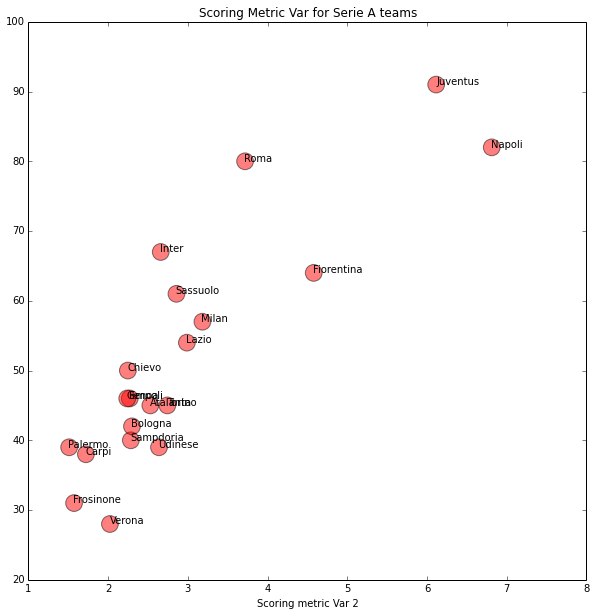

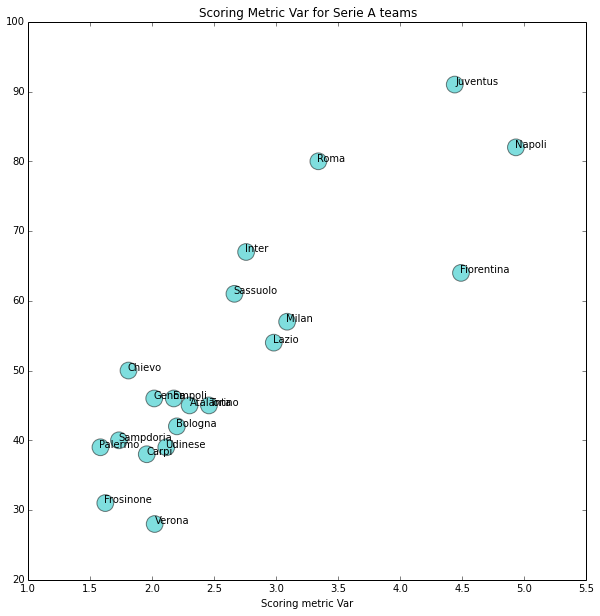

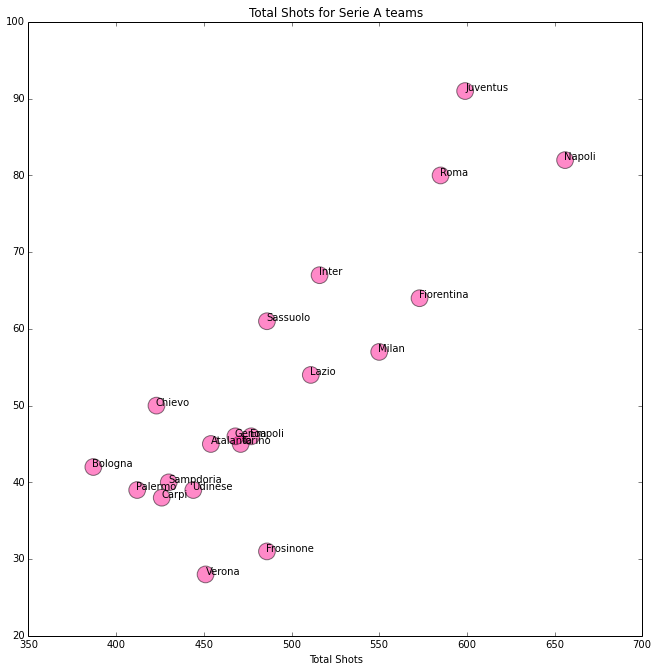

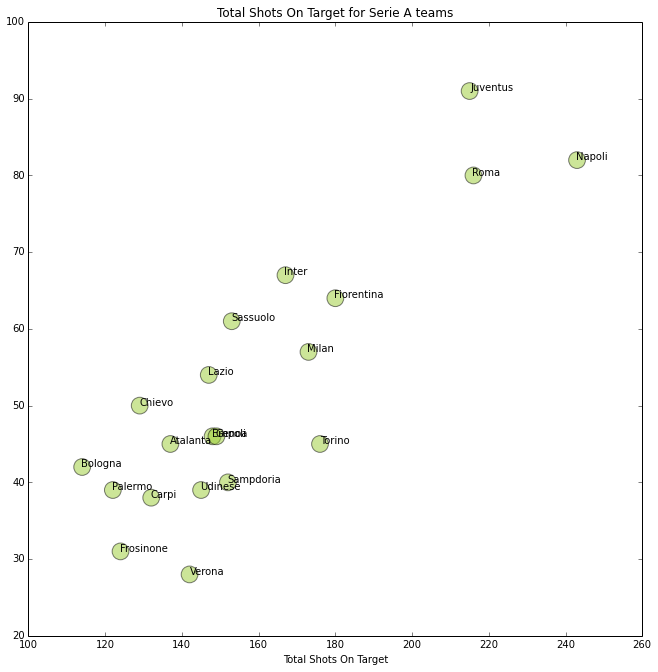

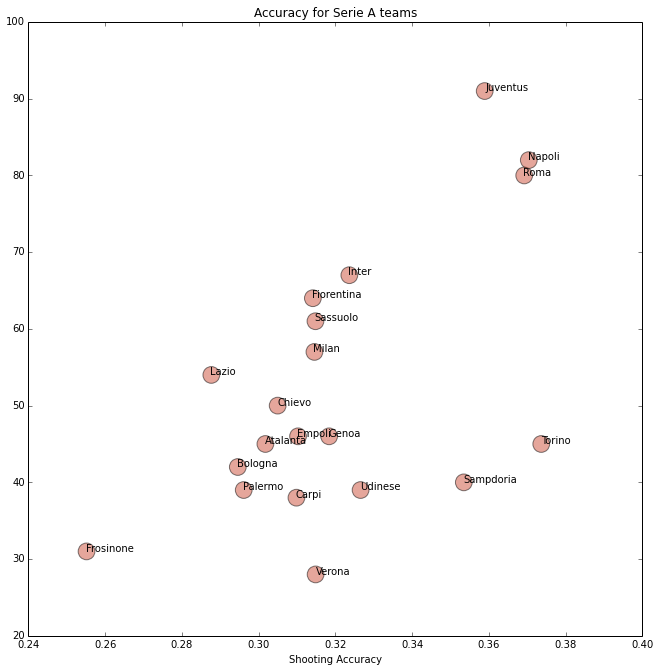

In [6]:
team_name_var2    = [t[0] for t in team_stat_var2_sort]
team_val_var2     = [t[2] for t in team_stat_var2_sort]
team_val_points   = [t[1] for t in team_stat_var2_sort]

#define shooting accuracy
shoot_acc = team_val_var2

#print team_val_points
#team_pos_var2   = arange(len(team_name))+.5 

#pos_sum = arange(len(team_name))+.5    # the bar centers on the y axis


figure(1)
figure(figsize=(20,20))
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(team_val_var2,team_val_points,c='r',s=280,alpha=0.5)
for i, txt in enumerate(team_name_var2):
    ax.annotate(txt,(team_val_var2[i],team_val_points[i]))
xlabel('Scoring metric Var 2')
title('Scoring Metric Var for Serie A teams')
plt.show()


team_name_var    = [t[0] for t in team_stat_var_sort]
team_val_var     = [t[2] for t in team_stat_var_sort]
team_val_points   = [t[1] for t in team_stat_var_sort]

#print team_val_points
#team_pos_var2   = arange(len(team_name))+.5 

#pos_sum = arange(len(team_name))+.5    # the bar centers on the y axis


figure(1)
figure(figsize=(20,20))
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(team_val_var,team_val_points,c='c',s=280,alpha=0.5)
for i, txt in enumerate(team_name_var):
    ax.annotate(txt,(team_val_var[i],team_val_points[i]))
xlabel('Scoring metric Var')
title('Scoring Metric Var for Serie A teams')
plt.show()




team_name_var    = [t[0] for t in team_stat_s_sort]
team_val_var     = [t[2] for t in team_stat_s_sort]
team_val_points   = [t[1] for t in team_stat_s_sort]

figure(1)
figure(figsize=(20,20))
fig, ax = plt.subplots(figsize=(11,11))

ax.scatter(team_val_var,team_val_points,c='#ff1493',s=280,alpha=0.5)
for i, txt in enumerate(team_name_var):
    ax.annotate(txt,(team_val_var[i],team_val_points[i]))
xlabel('Total Shots')
title('Total Shots for Serie A teams')
plt.show()



team_name_var    = [t[0] for t in team_stat_st_sort]
team_val_var     = [t[2] for t in team_stat_st_sort]
team_val_points   = [t[1] for t in team_stat_st_sort]

figure(1)
figure(figsize=(20,20))
fig, ax = plt.subplots(figsize=(11,11))

ax.scatter(team_val_var,team_val_points,c='#9acd32',s=280,alpha=0.5)
for i, txt in enumerate(team_name_var):
    ax.annotate(txt,(team_val_var[i],team_val_points[i]))
xlabel('Total Shots On Target')
title('Total Shots On Target for Serie A teams')
plt.show()



team_name_var    = [t[0] for t in team_stat_acc_sort]
team_val_var     = [t[2] for t in team_stat_acc_sort]
team_val_points   = [t[1] for t in team_stat_acc_sort]

figure(1)
figure(figsize=(20,20))
fig, ax = plt.subplots(figsize=(11,11))

ax.scatter(team_val_var,team_val_points,c='#cd4f39',s=280,alpha=0.5)
for i, txt in enumerate(team_name_var):
    ax.annotate(txt,(team_val_var[i],team_val_points[i]))
xlabel('Shooting Accuracy')
title('Accuracy for Serie A teams')
plt.show()


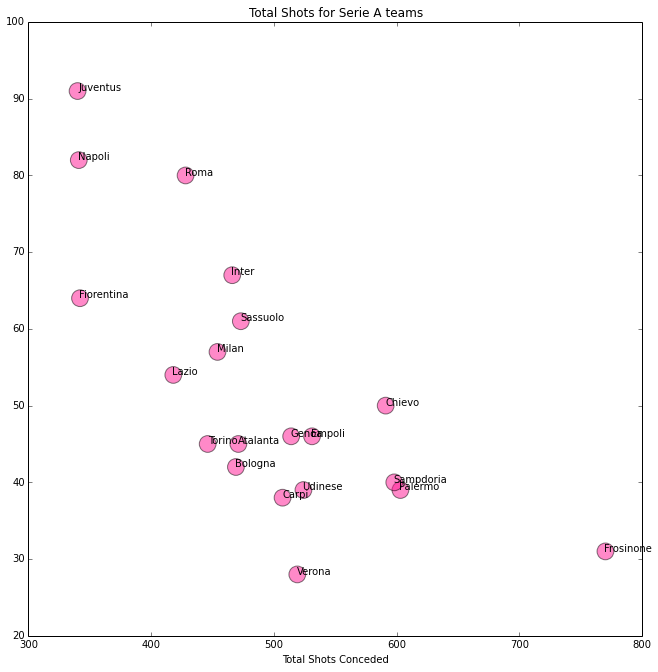

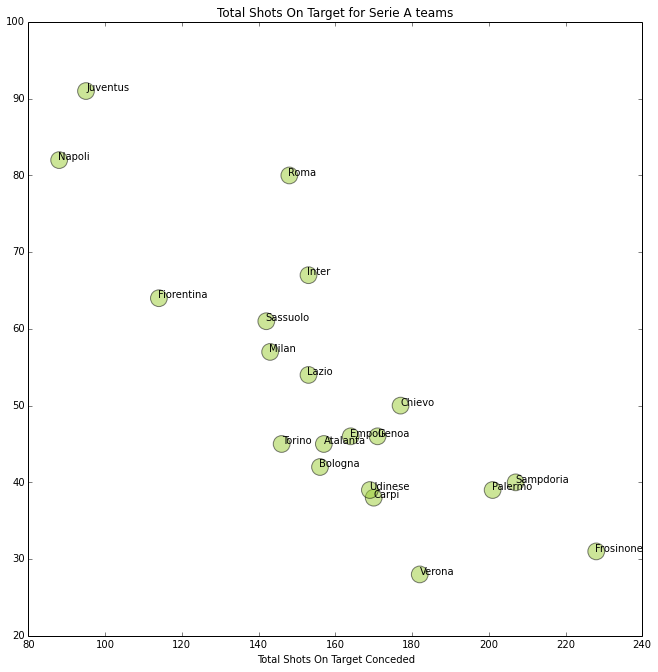

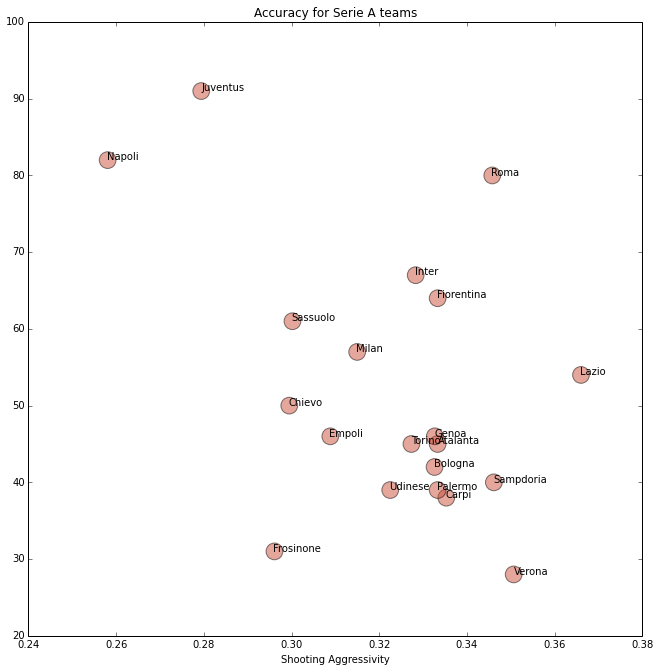

In [7]:
team_name_var    = [t[0] for t in team_stat_sc_sort]
team_val_var     = [t[2] for t in team_stat_sc_sort]
team_val_points   = [t[1] for t in team_stat_sc_sort]

figure(1)
figure(figsize=(20,20))
fig, ax = plt.subplots(figsize=(11,11))

ax.scatter(team_val_var,team_val_points,c='#ff1493',s=280,alpha=0.5)
for i, txt in enumerate(team_name_var):
    ax.annotate(txt,(team_val_var[i],team_val_points[i]))
xlabel('Total Shots Conceded')
title('Total Shots for Serie A teams')
plt.show()



team_name_var    = [t[0] for t in team_stat_stc_sort]
team_val_var     = [t[2] for t in team_stat_stc_sort]
team_val_points   = [t[1] for t in team_stat_stc_sort]

figure(1)
figure(figsize=(20,20))
fig, ax = plt.subplots(figsize=(11,11))

ax.scatter(team_val_var,team_val_points,c='#9acd32',s=280,alpha=0.5)
for i, txt in enumerate(team_name_var):
    ax.annotate(txt,(team_val_var[i],team_val_points[i]))
xlabel('Total Shots On Target Conceded')
title('Total Shots On Target for Serie A teams')
plt.show()



team_name_var    = [t[0] for t in team_stat_agg_sort]
team_val_var     = [t[2] for t in team_stat_agg_sort]
team_val_points   = [t[1] for t in team_stat_agg_sort]

figure(1)
figure(figsize=(20,20))
fig, ax = plt.subplots(figsize=(11,11))

ax.scatter(team_val_var,team_val_points,c='#cd4f39',s=280,alpha=0.5)
for i, txt in enumerate(team_name_var):
    ax.annotate(txt,(team_val_var[i],team_val_points[i]))
xlabel('Shooting Aggressivity')
title('Accuracy for Serie A teams')
plt.show()

shoot_agg = team_val_var

*Linear Regression*

Apply LInear Regression to the variable defined above 

Automatically created module for IPython interactive environment
[ 2.02211779  3.71766917  4.57867725  1.57227918  2.5290518   2.28441938
  2.24720893  2.63756266  6.81203704  2.65972652]
10
10
('Coefficients: \n', array([ 10.91415675, -81.19133704]))
Residual sum of squares: 152.06
Variance score: 0.56


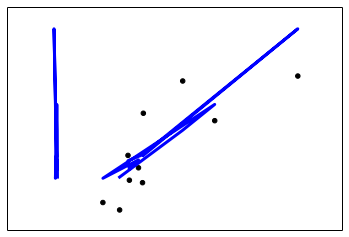

In [39]:
team_feat = [[t,v] for t,v in zip(shoot_acc,shoot_agg)]
team_val_points


print(__doc__)


# Code source: Jaques Grobler
# License: BSD 3 clause

# Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(team_feat, team_val_points, test_size=0.50, random_state=42)

print np.array(X_test)[:,0]
# Create linear regression object
regr = linear_model.LinearRegression()

print len(X_train)
print len(y_train)
# Train the model using the training sets
regr.fit(X_train, y_train)


# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))

# Plot outputs
plt.scatter(np.array(X_test)[:,0], y_test,  color='black')
plt.plot(X_test, regr.predict(X_test), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()